(569, 30)


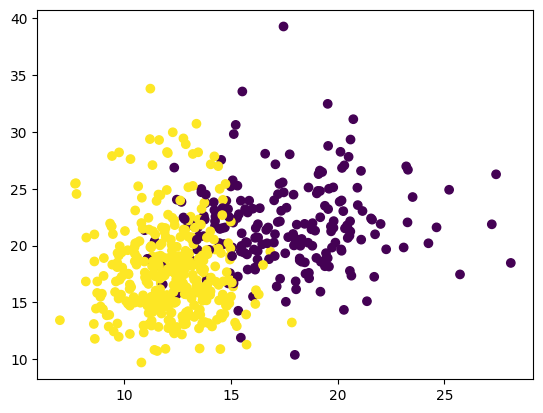

In [18]:
from sklearn.datasets import load_breast_cancer  # 引入肺癌数据集
from sklearn.svm import SVC  # 引入SVC类
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from time import time  # 为了计算算法的耗时引入时间类
import datetime

data = load_breast_cancer()  # 载入肺癌数据集
X = data.data  # X为特征向量
y = data.target  # y为类别标签
# from sklearn.preprocessing import StandardScaler
# X = StandardScaler().fit_transform(X)
print(X.shape)  # f返回X的维度(569,30)，可见有30个特征
np.unique(y)  # 查看标签y中有几个分类值，将返回array([0,1])

plt.scatter(X[:, 0], X[:, 1], c=y)  # 取前两个特征向量值绘制散点图
plt.show()

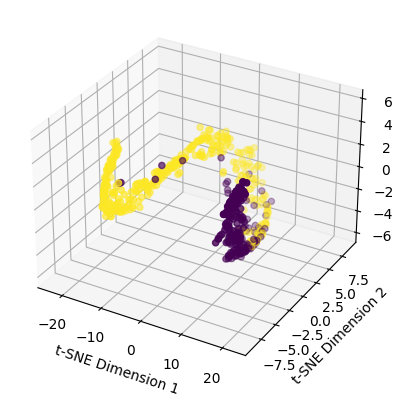

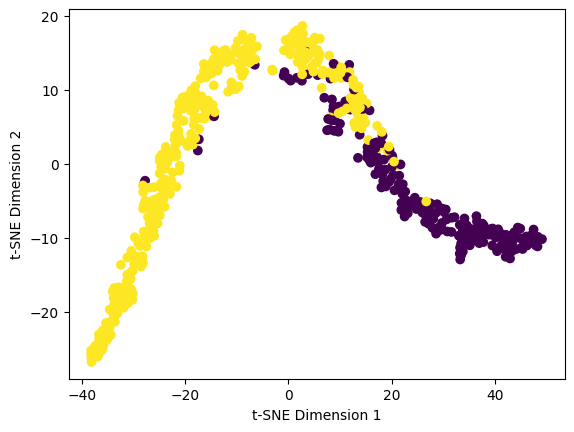

In [19]:
from sklearn.manifold import TSNE

# Perform t-SNE to reduce the data to 2D
tsne = TSNE(n_components=3, random_state=123)
iris_data_3d = tsne.fit_transform(X)

ax = plt.figure().add_subplot(111, projection = '3d')
ax.scatter(iris_data_3d[:, 0], iris_data_3d[:, 1], iris_data_3d[:, 2], c=y, cmap='viridis')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
plt.show()

# Perform t-SNE to reduce the data to 2D
tsne = TSNE(n_components=2, random_state=123)
iris_data_2d = tsne.fit_transform(X)
plt.scatter(iris_data_2d[:, 0], iris_data_2d[:, 1], c=y, cmap='viridis')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

The accuracy under kernel linear is 0.929825
耗时： 00:00:313349
The accuracy under kernel poly is 0.923977
耗时： 00:00:046874
The accuracy under kernel rbf is 0.596491
耗时： 00:00:031277
The accuracy under kernel sigmoid is 0.596491
耗时： 00:00:000000


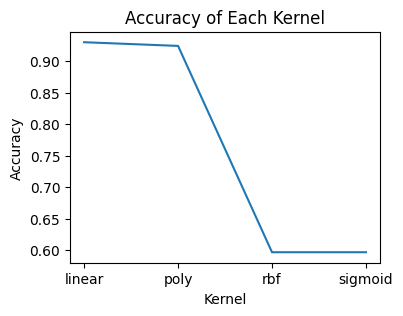

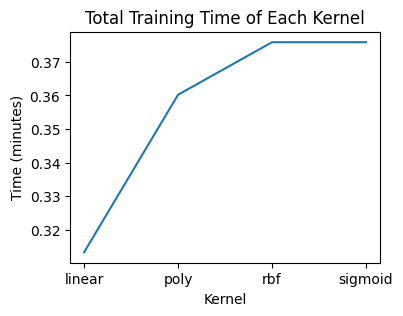

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# 分割训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=420)
Kernel = ["linear", "poly", "rbf", "sigmoid"]  # 使用4种核函数
total_time = 0  # 初始化总耗时变量

accuracy = []
times = []

# 循环遍历每种核函数
for kernel in Kernel:
    time0 = time()  # 为了计算耗时，获取当前时间的时间戳
    clf = SVC(kernel=kernel, gamma="auto", degree=1, cache_size=6000).fit(Xtrain, Ytrain)
    total_time += time() - time0  # 更新总耗时变量
    print("The accuracy under kernel %s is %f" % (kernel, clf.score(Xtest, Ytest)))
    print("耗时：", datetime.datetime.fromtimestamp(time() - time0).strftime("%M:%S:%f"))
    accuracy.append(clf.score(Xtest, Ytest))  # 将每个核函数的准确率添加到列表中
    times.append(total_time)

# 可视化准确率
plt.figure(figsize=(4, 3))
plt.plot(Kernel, accuracy, color='tab:blue')
plt.ylabel('Accuracy')
plt.xlabel('Kernel')
plt.title('Accuracy of Each Kernel')
plt.show()

# 可视化耗时
plt.figure(figsize=(4, 3))
plt.plot(Kernel, times, color='tab:blue')
plt.ylabel('Time (minutes)')
plt.xlabel('Kernel')
plt.title('Total Training Time of Each Kernel')
plt.show()

### （1）rbf核函数的参数调节
#### rbf核函数只有一个参数γ的值可调节。下面来寻找rbf核函数的最优γ参数，将如下代码插入到程序8-3中分割训练集和测试集的代码下面。

0.9298245614035088 0.00011513953993264481


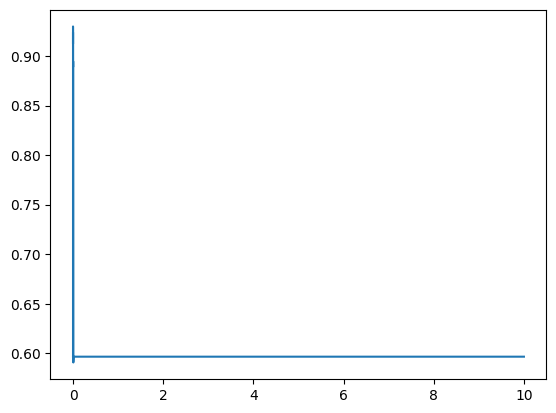

In [21]:
score = []
gamma_range = np.logspace(-10, 1, 50)  # 返回在对数刻度上均匀间隔的数字
for i in gamma_range:
    clf = SVC(kernel="rbf", gamma=i, cache_size=5000).fit(Xtrain, Ytrain)
    score.append(clf.score(Xtest, Ytest))
# 输出最大分数及最大分数对应的γ值
print(max(score), gamma_range[score.index(max(score))])
plt.plot(gamma_range, score)
plt.show()

#### （2）多项式核函数参数的调节
### 将如下代码插入到程序8-3中分割训练集和测试集的代码下面。

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

time0 = time()
gamma_range = np.logspace(-10, 1, 100)
coef0_range = np.linspace(0, 5, 50)
param_grid = dict(gamma=gamma_range, coef0=coef0_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=420)
grid = GridSearchCV(SVC(kernel="poly", degree=1, cache_size=5000),
                    param_grid=param_grid, cv=cv, n_jobs=4)
grid.fit(X, y)
print("The best parameters are %s with a score of %0.5f" % (grid.best_params_, grid.best_score_))
print(datetime.datetime.fromtimestamp(time() - time0).strftime("%M:%S:%f"))

The best parameters are {'coef0': 3.0612244897959187, 'gamma': 7.742636826811246} with a score of 0.96491
19:42:492037


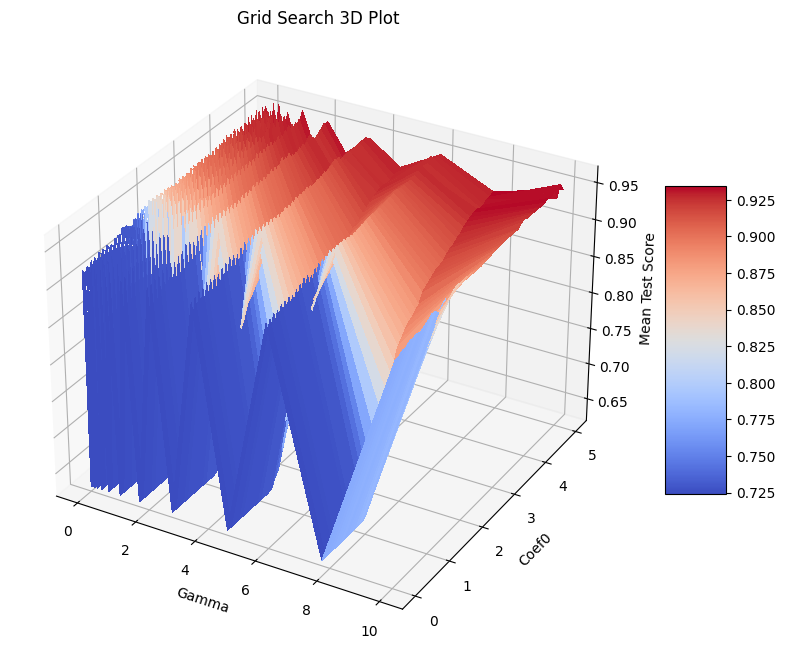

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have these variables defined
gamma_range = np.logspace(-10, 1, 100)
coef0_range = np.linspace(0, 5, 50)
scores = grid.cv_results_['mean_test_score'].reshape(len(gamma_range), len(coef0_range))

gamma_grid, coef0_grid = np.meshgrid(gamma_range, coef0_range)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(gamma_grid, coef0_grid, scores.T, cmap=plt.cm.coolwarm, antialiased=False)

# Add labels and a colorbar
ax.set_xlabel('Gamma')
ax.set_ylabel('Coef0')
ax.set_zlabel('Mean Test Score')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.title('Grid Search 3D Plot')
plt.show()


#### 4. 松弛系数惩罚项C的调整
### 将如下代码插入到程序8-3中分割训练集和测试集的代码下面

0.9298245614035088 0.6220408163265306


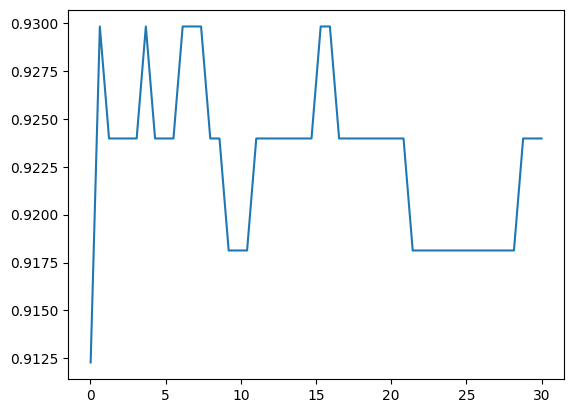

In [26]:

score = []
C_range = np.linspace(0.01, 30, 50)
# C_range = np.linspace(5,7,50)
for i in C_range:
    # 调节线性核函数的C值
    clf = SVC(kernel="linear", C=i, cache_size=5000).fit(Xtrain, Ytrain)
    # 调节rbf核函数的C值
    # clf = SVC(kernel="rbf",C=i, cache_size=5000, gamma = 0.01274) .fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest, Ytest))
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range, score)
plt.show()
